https://habrahabr.ru/post/314490/

conda install tensorflow

pip install git+git://github.com/Theano/Theano.git

pip install git+git://github.com/fchollet/keras.git

conda config --add channels menpo

conda install opencv

In [2]:
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import os
import h5py
from matplotlib import pyplot as plt

import theano
theano.config.openmp = True

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5110)


In [3]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1000, activation='softmax'))


    assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    print('Model loaded.')
    return model


model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

Model loaded.


In [18]:
path = "/home/user/dataset/jpg/"
ims = []
files = []
for f in os.listdir(path):
    print f
    if (f.endswith(".jpg")) and (os.stat(path+f) > 10000):
        try:
            files.append(f.encode('utf-8'))
            im = cv2.resize(cv2.imread(path+f), (224, 224)).astype(np.float32)
    #         plt.imshow(im)
    #         plt.show()
            im[:,:,0] -= 103.939
            im[:,:,1] -= 116.779
            im[:,:,2] -= 123.68
            im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            ims.append(im)
        except:
            print f

images = np.vstack(ims)
print images.shape

 431.jpg
913.jpg
185.jpg
233.jpg
502.jpg
828.jpg
539.jpg
739.jpg
912.jpg
260.jpg
712.jpg
165.jpg
627.jpg
235.jpg
140.jpg
110.jpg
227.jpg
370.jpg
3.jpg
318.jpg
583.jpg
422.jpg
674.jpg
770.jpg
394.jpg
660.jpg
520.jpg
234.jpg
352.jpg
857.jpg
212.jpg
343.jpg
452.jpg
722.jpg
765.jpg
128.jpg
690.jpg
789.jpg
485.jpg
678.jpg
97.jpg
323.jpg
625.jpg
434.jpg
491.jpg
112.jpg
338.jpg
162.jpg
668.jpg
102.jpg
238.jpg
651.jpg
905.jpg
715.jpg
47.jpg
514.jpg
752.jpg
376.jpg
177.jpg
588.jpg
429.jpg
432.jpg
378.jpg
777.jpg
60.jpg
58.jpg
26.jpg
239.jpg
207.jpg
173.jpg
219.jpg
347.jpg
587.jpg
324.jpg
148.jpg
840.jpg
217.jpg
22.jpg
82.jpg
108.jpg
418.jpg
430.jpg
153.jpg
775.jpg
194.jpg
366.jpg
590.jpg
213.jpg
433.jpg
469.jpg
17.jpg
447.jpg
556.jpg
471.jpg
616.jpg
349.jpg
168.jpg
168.jpg
362.jpg
328.jpg
203.jpg
236.jpg
916.jpg
524.jpg
877.jpg
736.jpg
788.jpg
4.jpg
582.jpg
832.jpg
320.jpg
594.jpg
355.jpg
446.jpg
2.jpg
706.jpg
907.jpg
608.jpg
829.jpg
872.jpg
206.jpg
903.jpg
404.jpg
77.jpg
254.jpg
284.jpg
793.jp

In [19]:
r1 =[]
r2= []
for i,x in enumerate(files):
    r1.append(((x[:-4]),i))
    r2.append((i,(x[:-4])))
extid_to_intid_dict = dict(r1)
intid_to_extid_dict = dict(r2)
print extid_to_intid_dict
print intid_to_extid_dict

{'199': 917, '818': 374, '345': 379, '346': 443, '347': 71, '340': 798, '341': 916, '342': 291, '343': 31, '810': 186, '811': 674, '812': 314, '813': 306, '814': 288, '349': 95, '816': 442, '817': 228, '719': 857, '718': 653, '717': 911, '716': 337, '715': 53, '714': 426, '713': 527, '712': 10, '711': 579, '710': 491, '421': 636, '420': 221, '423': 836, '422': 21, '195': 661, '911': 878, '619': 172, '424': 500, '427': 627, '298': 516, '299': 657, '296': 194, '297': 675, '294': 161, '912': 8, '292': 445, '293': 894, '290': 409, '291': 761, '591': 385, '590': 86, '593': 184, '592': 149, '595': 259, '594': 110, '597': 614, '596': 363, '599': 526, '194': 84, '197': 780, '196': 555, '191': 369, '190': 175, '193': 326, '192': 462, '270': 832, '271': 308, '272': 451, '273': 807, '274': 151, '275': 182, '276': 520, '277': 874, '278': 405, '279': 180, '524': 102, '525': 831, '526': 742, '527': 179, '520': 26, '521': 508, '522': 234, '523': 815, '528': 218, '529': 322, '449': 895, '448': 591, '4

In [20]:
print len(r1)

921


In [21]:
out = model.predict(images)
print out
print out.shape

[[ 0.90067017  1.04441524  1.10598218 ...,  0.          0.          0.        ]
 [ 0.          1.52288699  0.45571017 ...,  0.05517685  0.          0.2837927 ]
 [ 0.85647142  3.08027148  1.07202971 ...,  0.          0.          0.04003912]
 ..., 
 [ 0.          1.50403297  1.19134378 ...,  0.          0.          0.37421131]
 [ 0.          1.6477145   1.26387286 ...,  0.          0.          0.85272056]
 [ 0.          1.17159402  1.76981997 ...,  0.          0.          0.        ]]
(913, 4096)


## Поиск по расстоянию

 448


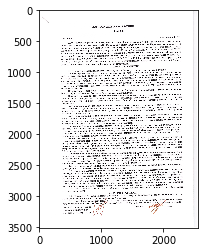

448 0.0

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


IndexError: index 448 is out of bounds for axis 0 with size 10

In [25]:
from sklearn.metrics.pairwise import pairwise_distances
extid = '1'
i = extid_to_intid_dict[str(extid)]
print i
plt.imshow(cv2.imread(path+files[i]))
plt.show()
dist = pairwise_distances(out[i],out, metric='cosine', n_jobs=1)

top = np.argsort(dist[0])[0:10]

for t in top:
    print t,dist[0][t], top[t]
    plt.imshow(cv2.imread(path+files[t]))
    plt.show()

# КЛАССТЕРИЗАЦИЯ

In [29]:
from sklearn.manifold import TSNE
X = out
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
res = model.fit_transform(X) 
res

array([[ 25.26748908,   0.68018298],
       [ -3.47887945,  23.64706307],
       [ 21.05681638,   1.10594284],
       ..., 
       [ 11.45836714,   6.51207886],
       [ -3.00838028,  19.94138693],
       [ 13.50841036,  11.8882808 ]])

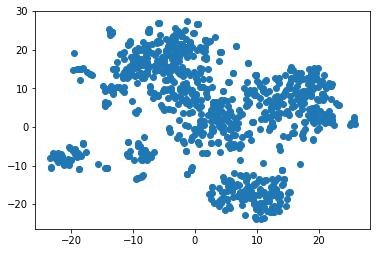

In [30]:
plt.scatter(res[:,0],res[:,1])

In [39]:
from scipy import cluster
from matplotlib import pyplot

In [53]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

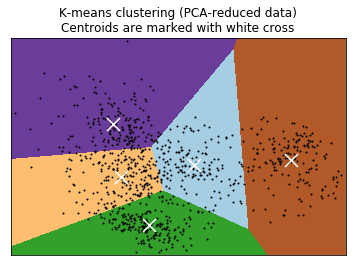

In [56]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()